In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import ttest_ind, shapiro, wilcoxon
import seaborn as sns; sns.set()

In [281]:
path = "/home/colombelli/Documents/Experiments05_ago/intersect/"

hom_exps = ["hom_geode", "hom_gr", "hom_relieff", "hom_su", "hom_wx"]
sin_exps = ["sin_geode", "sin_gr", "sin_relieff", "sin_su", "sin_wx"]

#exps = [ "het", "hyb_borda_borda", "hyb_stbw_borda"] + hom_exps + sin_exps
exps=["hyb_stbw_borda", "het"] + hom_exps

exp_translation = {
    "het": "Heterogêneo",
    "hyb_stbw_borda": "Híbrido",
    "hom_geode": "Homogêneo GeoDE",
    "hom_gr": "Homogêneo Gain Ratio",
    "hom_su": "Homogêneo Symmetrical Uncertainty",
    "hom_relieff": "Homogêneo ReliefF",
    "hom_wx": "Homogêneo Wx"
}

In [282]:
results = {}

In [283]:
def add_experiment(experiment):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    df['Tipo'] = [exp_translation[experiment] for i in range(len(df))]
    results[experiment] = df
    return

In [284]:
for e in exps:
    add_experiment(e)

In [285]:
renamed_cols= {
    'th_int': 'Quantidade de genes selecionados',
    'stabilities': 'Estabilidade',
    'mean_ACC': 'Acurácia'
}

concat_df = pd.concat(list(results.values()))
concat_df = concat_df.rename(columns=renamed_cols, index={'ONE': 'one'})
concat_df['Trade-off'] = concat_df['Estabilidade'] + 2*concat_df['Acurácia']

In [286]:
hy_he = concat_df.loc[concat_df['Tipo'].isin(['Heterogêneo', 'Híbrido'])]

hy_hom_items = [
    "Híbrido", "Homogêneo GeoDE", "Homogêneo Gain Ratio", 
    "Homogêneo Symmetrical Uncertainty", "Homogêneo ReliefF", 
    "Homogêneo Wx"
]

hy_hom = concat_df.loc[concat_df['Tipo'].isin(hy_hom_items)]

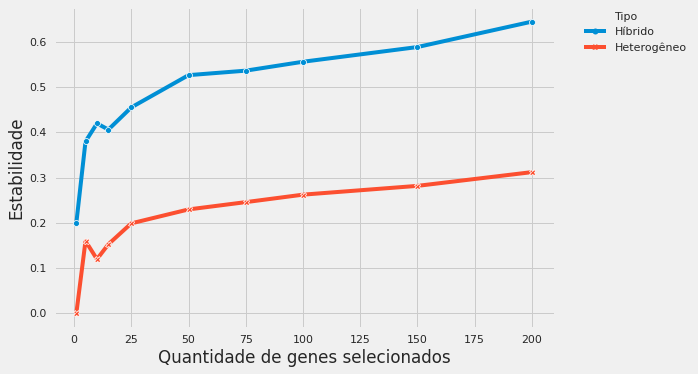

In [287]:
sns.lineplot(x="Quantidade de genes selecionados", y="Estabilidade", data=hy_he, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

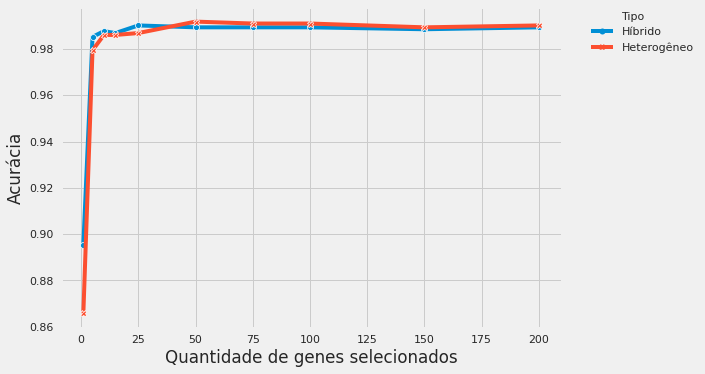

In [288]:
sns.lineplot(x="Quantidade de genes selecionados", y="Acurácia", data=hy_he, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

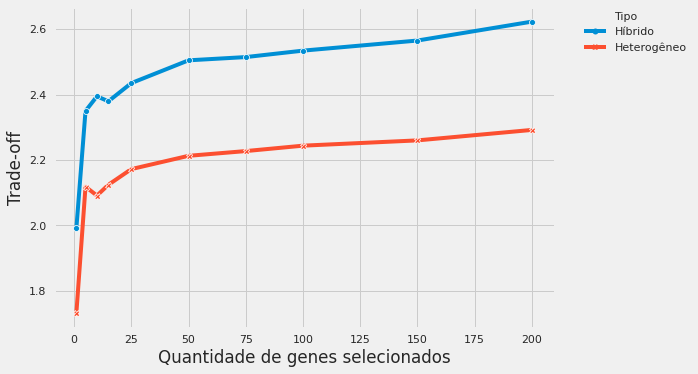

In [289]:
sns.lineplot(x="Quantidade de genes selecionados", y="Trade-off", data=hy_he, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

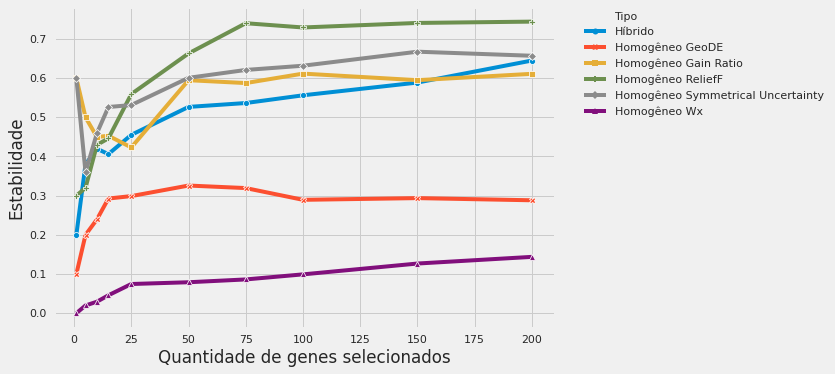

In [290]:
sns.lineplot(x="Quantidade de genes selecionados", y="Estabilidade", data=hy_hom, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

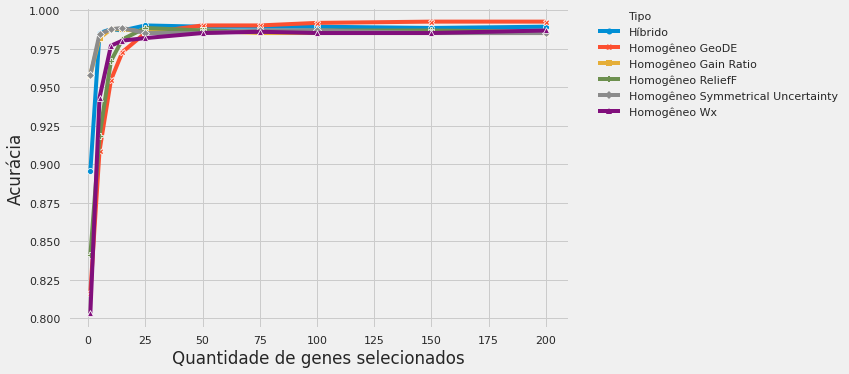

In [291]:
sns.lineplot(x="Quantidade de genes selecionados", y="Acurácia", data=hy_hom, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

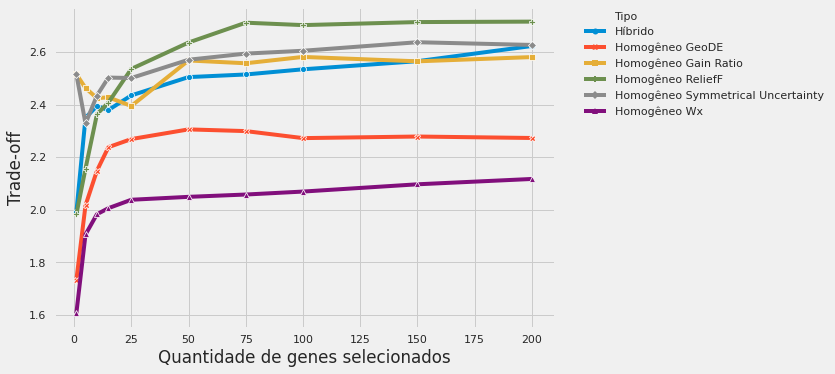

In [292]:
sns.lineplot(x="Quantidade de genes selecionados", y="Trade-off", data=hy_hom, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

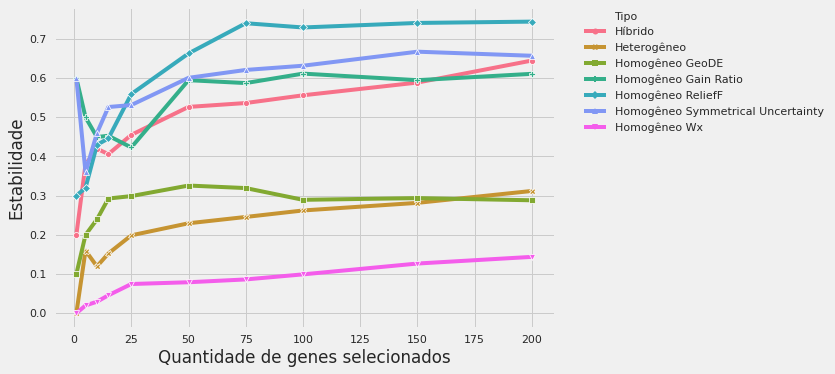

In [293]:
sns.lineplot(x="Quantidade de genes selecionados", y="Estabilidade", data=concat_df, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

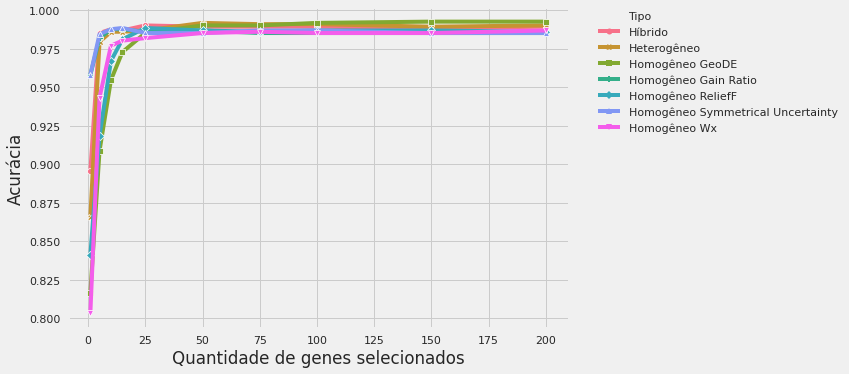

In [294]:
sns.lineplot(x="Quantidade de genes selecionados", y="Acurácia", data=concat_df, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

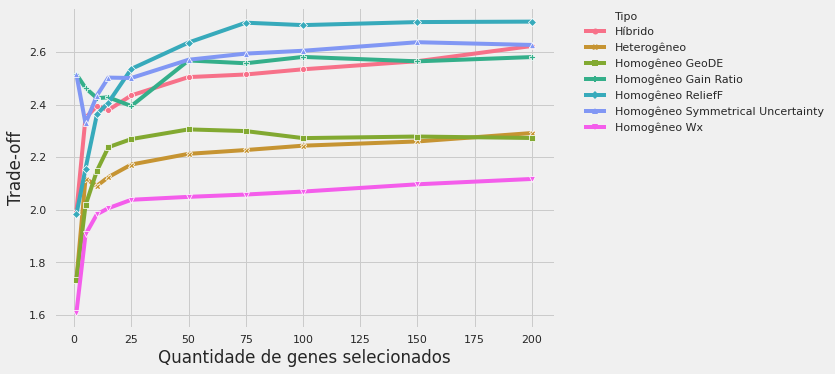

In [295]:
sns.lineplot(x="Quantidade de genes selecionados", y="Trade-off", data=concat_df, hue="Tipo", style="Tipo", dashes=False, markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [296]:
xticks = [0, 1, 5, 10, 15, 25, 50, 75, 100, 150, 200]

In [320]:
path = "/home/colombelli/Documents/PIBITI/presentation/plots/"

def save_plot(y_col, df, title):
    style.use('fivethirtyeight')
    p = sns.lineplot(x="Quantidade de genes selecionados", y=y_col, data=df, 
                     hue="Tipo", style="Tipo", dashes=False, markers=True, linewidth=2, sort=False)
    p.set_xticklabels(xticks)
    
    plt.title(title)
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    for line in leg.get_lines():
        line.set_linewidth(1.5)
        
    for line in p.get_lines():
        if line.get_label() == '_line0':
            line.set_linewidth(4.0)
            line.set_zorder(10)
            
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(path+title+"_"+y_col, bbox_inches = "tight")
    
    return

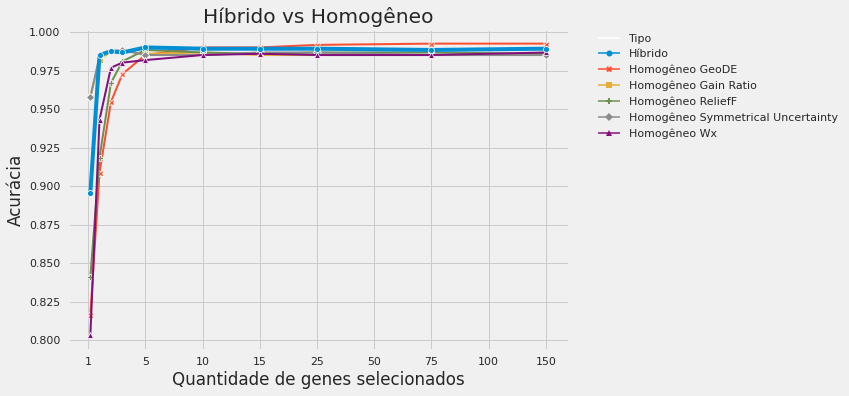

<Figure size 576x396 with 0 Axes>

In [321]:
save_plot("Acurácia", hy_hom, "Híbrido vs Homogêneo")

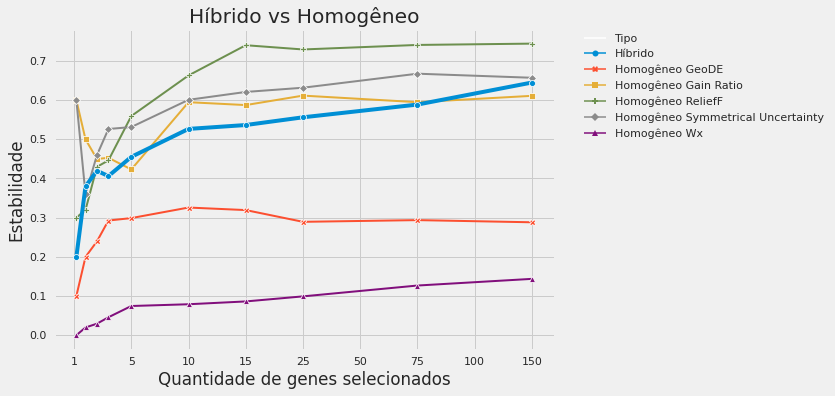

<Figure size 576x396 with 0 Axes>

In [322]:
save_plot("Estabilidade", hy_hom, "Híbrido vs Homogêneo")

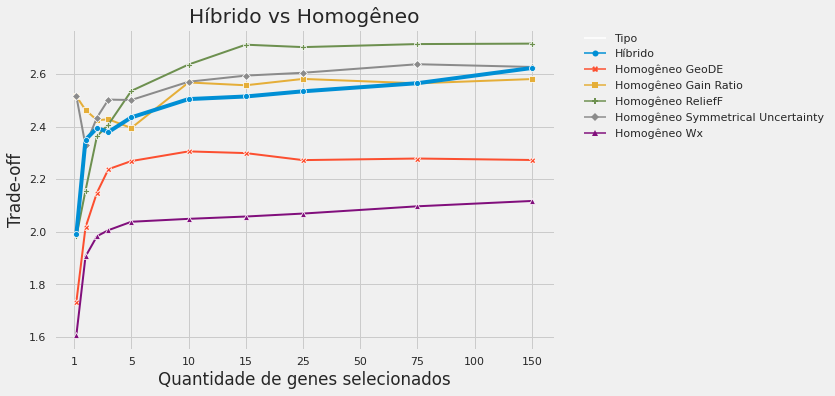

<Figure size 576x396 with 0 Axes>

In [323]:
save_plot("Trade-off", hy_hom, "Híbrido vs Homogêneo")